In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

# Calculate Tolerance Intervals for the Reconstructed Plutonium

In this notebook, we illustrate why and how we calculate non-parametric tolerance intervals.
A non-parametric calculation is necessary, if the sampled distribution does not resemble any parametrized probability distribution with known tolerance limits.
For example, the 95\,% tolerance interval of a normal distribution can be approximated by calculating an interval [$\mu - 2\sigma$, $\mu + 2\sigma$], where $\mu$ is the mean of the sample and $\sigma$ the standard deviation. 

The first subset of plutonium estimates corresponds to the CANDU-2 case in the manuscript.
The plots further below show that this sample closely resembles a normal distribution.
The second subset of plutonium estimates corresponds to the YB-1 case in the manuscript.
This plutonium distribution does not resemble a normal distribution.
The plots below show that in this case, a tolerance interval approximated by $\pm 2\sigma$ does not match a non-parametrically calculated tolerance interval.

Here we load an array of plutonium estimates.
Each entry in the array corresponds to an IRM estimate performed with one set of input parameters.

In [2]:
reconstructed_pu = np.genfromtxt('plutonium_from_samples.csv')

It is possible to calculate tolerance intervals for a non-parametric probability distribution.
The following function follows the book 'Statistical Tolerance Regions' by Krishnamoorthy and Mathew.

In [3]:
def non_parametric_tolerance_interval(data, m, p, axis=0):
    """Calculate a tolerance interval for a non parametric distribution.
    
    Sorts the data from lowest to highest (order statistic) and takes
    the m/2-th value from both sides of the sorted array as tolerance
    limits. Properties of the binomial distribution are used to estimate
    the confidence level for this tolerance interval.
    
    Source: 'Statistical Tolerance Regions' by Krishnamoorthy and Mathew.
    
    Parameters
    ----------
    data : array (floats)
        Samples of the distribution
    m : int
        Index for the bounds of the interval
    p : float
        Portion of true distribution that should be inside
        the tolerance level with the calculated confidence
        level.
    axis : int (defaults to 0)
        Axis of the array along which to calculate the tolerance
        interval.
        
    Returns
    -------
    conf : float
        Estimated confidence level for the tolerance bounds.
    Bounds : array (floats)
        Bounds of the tolerance interval.
    """
    n = data.shape[axis]
    if not isinstance(m, int):
        print('m should be an integer')
    if m%2 == 0:
        low = int(m / 2)
        upp = int(n - m / 2)
    else:
        low = int((m + 1) / 2)
        upp = int(n  + 1 - (m + 1) / 2)
    order_statistics = np.sort(data, axis=axis)
    q = n - m - 1
    conf = binom.cdf(q, n, p)
    
    lower = np.take(order_statistics, low, axis=axis)
    upper = np.take(order_statistics, upp, axis=axis)
    
    return {'Conf level': conf, 'Bounds': np.array([lower, upper])}

Now we calculate the tolerance interval for the plutonium array from above.
The value of m is chosen so that the confidence level is 95\%.

In [4]:
tol_int = non_parametric_tolerance_interval(reconstructed_pu, 177, 0.95)

If the distribution follows a normal distribution, the 95\% tolerance interval is approximately $\mu \pm 2\times\sigma$.
(The mean of the distribution plus/minus twice the standard deviation.)

In [5]:
normal_tol_int = [reconstructed_pu.mean() - 2 * reconstructed_pu.std(ddof=1), 
                  reconstructed_pu.mean() + 2 * reconstructed_pu.std(ddof=1)]

We can compare the two tolerance intervals in a histogram.
The blue bars in the graphic show a histogram of the plutonium samples, normalized so that it corresponds to a probability distribution.
In this case, the distribution closely resembles a normal distribution.
We can see that the two differently calculated tolerance intervalse match quite well.

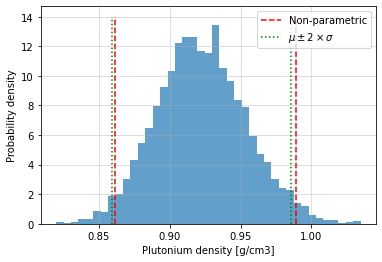

In [6]:
plt.figure()
plt.grid(alpha=0.5)
plt.hist(reconstructed_pu, bins=41, density=True, alpha=0.7)
plt.vlines(tol_int['Bounds'], 0, 14, ls='dashed', color='red', label='Non-parametric')
plt.vlines(normal_tol_int, 0, 14, ls='dotted', color='green', label=r'$\mu\pm 2\times\sigma$')
plt.legend()
plt.xlabel('Plutonium density [g/cm3]')
plt.ylabel('Probability density')
plt.show()

Here, we show an example where the distribution does not resemble a normal distribution.
The vertical dashed lines indicate the tolerance limits.
In this case they do not match.

In [7]:
pu_2 = np.genfromtxt('plutonium_from_samples_2.csv')
tol_int_2 = tol_int = non_parametric_tolerance_interval(pu_2, 177, 0.95)

normal_tol_int_2 = [pu_2.mean() - 2 * pu_2.std(ddof=1), 
                    pu_2.mean() + 2 * pu_2.std(ddof=1)]

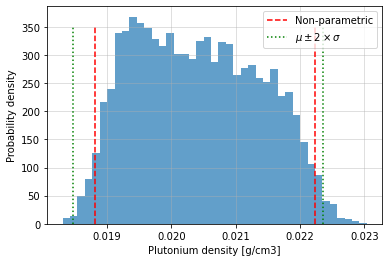

In [8]:
plt.figure()
plt.grid(alpha=0.5)
plt.hist(pu_2, bins=41, density=True, alpha=0.7)
plt.vlines(tol_int_2['Bounds'], 0, 350, ls='dashed', color='red', label='Non-parametric')
plt.vlines(normal_tol_int_2, 0, 350, ls='dotted', color='green', label=r'$\mu\pm 2\times\sigma$')
plt.legend()
plt.xlabel('Plutonium density [g/cm3]')
plt.ylabel('Probability density')
plt.show()